In [21]:
# Section 1 Business Understanding - This seeks to assist Volcano tourists in selection of travel destinations.
# Question 1 How can I identify potential travel destinations for clients of volcano tourism.
# Question 2 How can I customise the closest most active volcanic island tour for tourists from South Africa?
# Question 3 How can I customise the travel destination for those tourists with no travel restriction?


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df = pd.read_csv('https://raw.githubusercontent.com/nirvannar/UdacityProject/main/GVP_Volcano_List_Holocene1.csv',encoding='latin-1')


In [396]:
# Section 2 Data Understanding
df.head() # Explore the first few rows of the dataset

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
0,355130,"Ojos del Salado, Nevados",Chile-Argentina,Stratovolcano,Eruption Dated,750 CE,South America,"Northern Chile, Bolivia and Argentina",-27.109,-68.541,6879,Dacite,Subduction zone / Continental crust (>25 km)
1,355110,Llullaillaco,Chile-Argentina,Stratovolcano,Eruption Observed,1877 CE,South America,"Northern Chile, Bolivia and Argentina",-24.720,-68.530,6739,Dacite,Subduction zone / Continental crust (>25 km)
2,355220,Tipas,Argentina,Complex,Evidence Credible,Unknown,South America,"Northern Chile, Bolivia and Argentina",-27.196,-68.561,6658,No Data (checked),Subduction zone / Continental crust (>25 km)
3,355125,"Incahuasi, Nevado de",Chile-Argentina,Stratovolcano(es),Evidence Uncertain,Unknown,South America,"Northern Chile, Bolivia and Argentina",-27.033,-68.296,6638,Dacite,Subduction zone / Continental crust (>25 km)
4,354003,Coropuna,Peru,Stratovolcano,Evidence Credible,Unknown,South America,Peru,-15.520,-72.650,6377,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)


In [8]:
df.describe() # Summary statistics associated with the quantitative variables


,Volcano Number,Latitude,Longitude,Elevation (m)
count,1398.000000,1398.000000,1398.000000,1398.000000
mean,297031.030043,14.787760,22.625187,1694.133047
std,48652.565558,31.913561,114.536931,1597.027543
min,210010.000000,-78.500000,-179.970000,-5700.000000
25%,261162.500000,-6.955750,-78.440500,734.000000
50%,300051.500000,14.042000,38.156500,1477.000000
75%,342137.500000,43.135250,139.346500,2371.500000
max,390847.000000,85.608000,179.580000,6879.000000


In [9]:
df.shape


(1398, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398 entries, 0 to 1397
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Volcano Number        1398 non-null   int64  
 1   Volcano Name          1398 non-null   object 
 2   Country               1398 non-null   object 
 3   Primary Volcano Type  1398 non-null   object 
 4   Activity Evidence     1398 non-null   object 
 5   Last Known Eruption   1398 non-null   object 
 6   Region                1398 non-null   object 
 7   Subregion             1398 non-null   object 
 8   Latitude              1398 non-null   float64
 9   Longitude             1398 non-null   float64
 10  Elevation (m)         1398 non-null   int64  
 11  Dominant Rock Type    1377 non-null   object 
 12  Tectonic Setting      1393 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 142.1+ KB


In [11]:
df.isnull().any() # Check for columns with blanks by calculating the number of null values

Volcano Number          False
Volcano Name            False
Country                 False
Primary Volcano Type    False
Activity Evidence       False
Last Known Eruption     False
Region                  False
Subregion               False
Latitude                False
Longitude               False
Elevation (m)           False
Dominant Rock Type       True
Tectonic Setting         True
dtype: bool

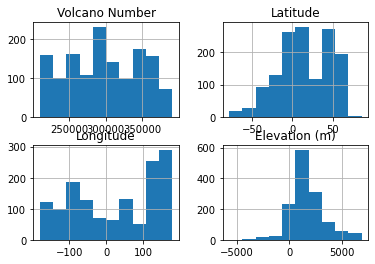

In [12]:
df.hist();

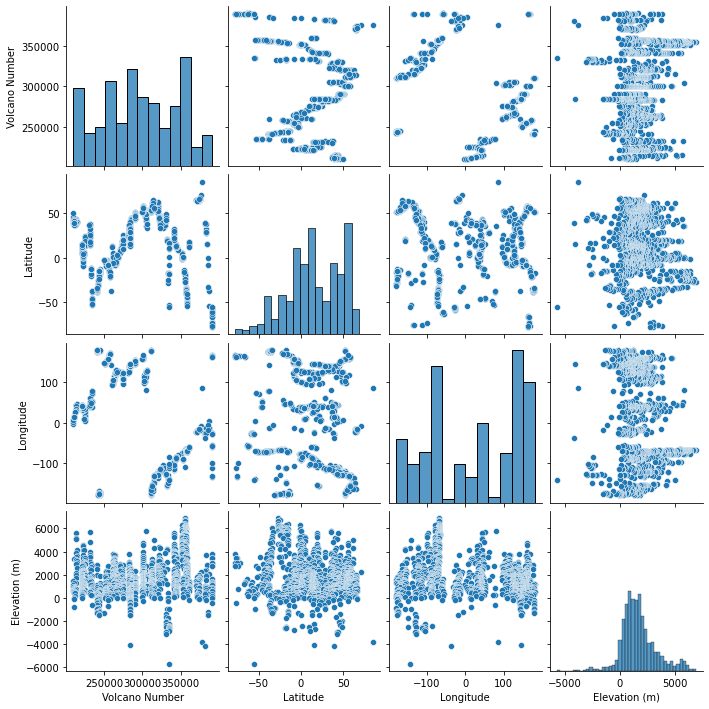

In [13]:
sns.pairplot(df)

<AxesSubplot:>

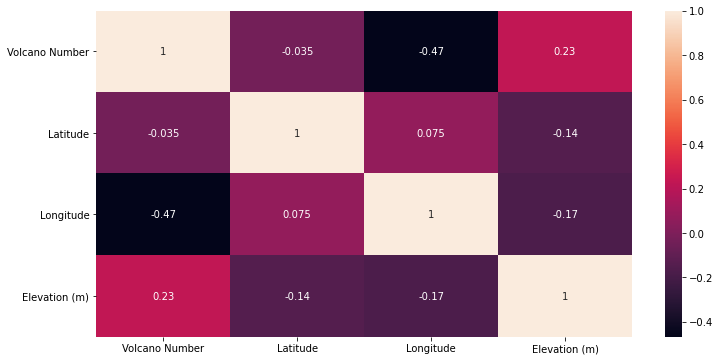

In [403]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

In [14]:
# Section 3 Data Preparation 

#Rename columns
df = df.rename(columns={'Volcano Number': 'Number', 'Volcano Name': 'Name','Primary Volcano Type': 'Type', 'Activity Evidence': 'Activity','Last Known Eruption':'Eruption', 'Elevation (m)':'Elevation'})

In [15]:
df['Country'] = df['Country'].str.rsplit('-', 1).str.get(0)  #Show country before hyphen only, remove country after hyphen
#print(df['Country'])
df['Country'].value_counts() # Most volcanoes per country in percentage

United States                       166
Russia                              142
Indonesia                           124
Japan                               107
Chile                                96
                                   ... 
Saint Lucia                           1
Syria-Jordan                          1
Saint Vincent and the Grenadines      1
Syria                                 1
North Korea                           1
Name: Country, Length: 79, dtype: int64

In [16]:
#Manipulate the Primary Volcano Type columns to exclude plurals

df['Type'] = df['Type'].str.replace(r"\s*\([^()]*\)","").str.strip() #remove plurals in parentheses
df['Type'] = df['Type'].str.replace("(","").replace(")","") #remove "()"
df['Type'] = df['Type'].str.replace("?","") #remove "?"


<ipython-input-16-6e1b7100b95f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Type'] = df['Type'].str.replace(r"\s*\([^()]*\)","").str.strip() #remove plurals in parentheses
<ipython-input-16-6e1b7100b95f>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Type'] = df['Type'].str.replace("(","").replace(")","") #remove "()"
<ipython-input-16-6e1b7100b95f>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Type'] = df['Type'].str.replace("?","") #remove "?"


In [17]:
df.head()  #Check new names and Type, Country manipulation

,Number,Name,Country,Type,Activity,Eruption,Region,Subregion,Latitude,Longitude,Elevation,Dominant Rock Type,Tectonic Setting
0,355130,"Ojos del Salado, Nevados",Chile,Stratovolcano,Eruption Dated,750 CE,South America,"Northern Chile, Bolivia and Argentina",-27.109,-68.541,6879,Dacite,Subduction zone / Continental crust (>25 km)
1,355110,Llullaillaco,Chile,Stratovolcano,Eruption Observed,1877 CE,South America,"Northern Chile, Bolivia and Argentina",-24.720,-68.530,6739,Dacite,Subduction zone / Continental crust (>25 km)
2,355220,Tipas,Argentina,Complex,Evidence Credible,Unknown,South America,"Northern Chile, Bolivia and Argentina",-27.196,-68.561,6658,No Data (checked),Subduction zone / Continental crust (>25 km)
3,355125,"Incahuasi, Nevado de",Chile,Stratovolcano,Evidence Uncertain,Unknown,South America,"Northern Chile, Bolivia and Argentina",-27.033,-68.296,6638,Dacite,Subduction zone / Continental crust (>25 km)
4,354003,Coropuna,Peru,Stratovolcano,Evidence Credible,Unknown,South America,Peru,-15.520,-72.650,6377,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)


In [408]:
# Section 4 Evaluation
# Question 1 How can I identify potential travel destinations for clients of volcano tourism.

In [18]:
print(df[df['Elevation']==df['Elevation'].max()]) # Highest Volcano in the World

   Number                      Name Country           Type        Activity  \
0  355130  Ojos del Salado, Nevados   Chile  Stratovolcano  Eruption Dated   

  Eruption         Region                              Subregion  Latitude  \
0   750 CE  South America  Northern Chile, Bolivia and Argentina   -27.109   

   Longitude  Elevation Dominant Rock Type  \
0    -68.541       6879             Dacite   

                               Tectonic Setting  
0  Subduction zone / Continental crust (>25 km)  


In [19]:
#Finding highest volcano per region
df.groupby(['Region'], sort =False)['Elevation'].max()

Region
South America                     6879
Kamchatka and Mainland Asia       5808
Middle East and Indian Ocean      5670
Mediterranean and Western Asia    5642
México and Central America        5564
Alaska                            5005
Africa and Red Sea                4565
Canada and Western USA            4392
Hawaii and Pacific Ocean          4205
Indonesia                         3800
Antarctica                        3794
Japan, Taiwan, Marianas           3776
Atlantic Ocean                    3715
Philippines and SE Asia           2938
New Zealand to Fiji               2797
Melanesia and Australia           2715
Kuril Islands                     2285
Iceland and Arctic Ocean          2197
West Indies                       1467
Name: Elevation, dtype: int64

In [20]:
#Finding highest volcano per region and country
df.groupby(['Region','Country'], sort=False)['Elevation'].max()

Region                       Country          
South America                Chile                6879
                             Argentina            6658
                             Peru                 6377
                             Ecuador              6310
Kamchatka and Mainland Asia  China                5808
                                                  ... 
Hawaii and Pacific Ocean     Undersea Features     -39
New Zealand to Fiji          Undersea Features    -385
Atlantic Ocean               Undersea Features   -1200
Hawaii and Pacific Ocean     Canada              -2050
Iceland and Arctic Ocean     Undersea Features   -3800
Name: Elevation, Length: 101, dtype: int64

In [21]:
#Finding highest volcano per country
df.groupby(['Country'], sort=False)['Elevation'].max()

Country
Chile                6879
Argentina            6658
Peru                 6377
Ecuador              6310
China                5808
                     ... 
Germany               600
Syria                 516
North Korea           452
Djibouti              298
Undersea Features     -39
Name: Elevation, Length: 79, dtype: int64

In [22]:
#Finding highest volcano name per country
df.groupby(['Country','Name'], sort=False)['Elevation'].max()

Country            Name                              
Chile              Ojos del Salado, Nevados              6879
                   Llullaillaco                          6739
Argentina          Tipas                                 6658
Chile              Incahuasi, Nevado de                  6638
Peru               Coropuna                              6377
                                                         ... 
Undersea Features  Jackson Segment                      -3100
                   East Gakkel Ridge at 85°E            -3800
United States      Mariana Back-Arc Segment at 15.5°N   -4100
Undersea Features  Pico Fracture Zone                   -4200
                   Udintsev Transform                   -5700
Name: Elevation, Length: 1393, dtype: int64

In [23]:
#Finding highest volcano type and name per region
df.groupby(['Country','Type','Name'], sort=False)['Elevation'].max()

Country            Type           Name                              
Chile              Stratovolcano  Ojos del Salado, Nevados              6879
                                  Llullaillaco                          6739
Argentina          Complex        Tipas                                 6658
Chile              Stratovolcano  Incahuasi, Nevado de                  6638
Peru               Stratovolcano  Coropuna                              6377
                                                                        ... 
Undersea Features  Submarine      Jackson Segment                      -3100
                                  East Gakkel Ridge at 85°E            -3800
United States      Submarine      Mariana Back-Arc Segment at 15.5°N   -4100
Undersea Features  Submarine      Pico Fracture Zone                   -4200
                                  Udintsev Transform                   -5700
Name: Elevation, Length: 1393, dtype: int64

In [24]:
df[df['Elevation']==df['Elevation'].max()] # Highest Volcano

,Number,Name,Country,Type,Activity,Eruption,Region,Subregion,Latitude,Longitude,Elevation,Dominant Rock Type,Tectonic Setting
0,355130,"Ojos del Salado, Nevados",Chile,Stratovolcano,Eruption Dated,750 CE,South America,"Northern Chile, Bolivia and Argentina",-27.109,-68.541,6879,Dacite,Subduction zone / Continental crust (>25 km)


In [25]:
df[df['Elevation']==df['Elevation'].min()] # Lowest Volcano

,Number,Name,Country,Type,Activity,Eruption,Region,Subregion,Latitude,Longitude,Elevation,Dominant Rock Type,Tectonic Setting
1397,335030,Udintsev Transform,Undersea Features,Submarine,Evidence Uncertain,Unknown,Hawaii and Pacific Ocean,Pacific Ocean (southern),-56.153,-143.373,-5700,No Data (checked),Intraplate / Oceanic crust (< 15 km)


In [26]:
df['Country'].value_counts(normalize=True).mul(100) # Most volcanoes per country in percentage

United States                       11.874106
Russia                              10.157368
Indonesia                            8.869814
Japan                                7.653791
Chile                                6.866953
                                      ...    
Saint Lucia                          0.071531
Syria-Jordan                         0.071531
Saint Vincent and the Grenadines     0.071531
Syria                                0.071531
North Korea                          0.071531
Name: Country, Length: 79, dtype: float64

In [27]:
df.loc[df['Country'].str.contains('Chile'), ['Name']]

,Name
0,"Ojos del Salado, Nevados"
1,Llullaillaco
3,"Incahuasi, Nevado de"
6,Parinacota
8,Pular
...,...
1141,Puyuhuapi
1150,Cayutue-La Vigueria
1152,Rapa Nui
1223,Pali-Aike Volcanic Field


In [28]:
df['Region'].value_counts(normalize=True).mul(100) # Most volcanoes per region in percentage

South America                     13.161660
Japan, Taiwan, Marianas            9.585122
Indonesia                          9.012876
Kamchatka and Mainland Asia        9.012876
Africa and Red Sea                 8.512160
México and Central America         7.796853
Alaska                             6.223176
Melanesia and Australia            5.221745
Canada and Western USA             4.649499
New Zealand to Fiji                4.148784
Philippines and SE Asia            3.576538
Kuril Islands                      3.147353
Middle East and Indian Ocean       3.004292
Mediterranean and Western Asia     2.932761
Iceland and Arctic Ocean           2.575107
Hawaii and Pacific Ocean           2.360515
Atlantic Ocean                     2.002861
Antarctica                         1.931330
West Indies                        1.144492
Name: Region, dtype: float64

In [29]:
df['Type'].value_counts(normalize=True).mul(100) # Volcano Types in descending order in percentage

Stratovolcano         48.855508
Shield                11.015737
Submarine              8.369099
Pyroclastic cone       7.439199
Caldera                6.151645
Volcanic field         5.722461
Complex                3.791130
Lava dome              2.646638
Fissure vent           1.287554
Maar                   1.144492
Tuff cone              0.858369
Compound               0.858369
Pyroclastic shield     0.572246
Crater rows            0.429185
Subglacial             0.357654
Lava cone              0.286123
Cone                   0.071531
Explosion crater       0.071531
Tuff ring              0.071531
Name: Type, dtype: float64

In [30]:
targets = df.loc[df['Eruption'] == "2021 CE", ['Name']] #Volcanoes active this year
print(targets)


                        Name
20                 Sabancaya
59              Popocatepetl
62                    Sangay
63          Ruiz, Nevado del
81              Klyuchevskoy
138                  Kerinci
139                   Erebus
144                    Fuego
146              Santa Maria
153                   Semeru
160               Reventador
177               Nyiragongo
188                Turrialba
191                     Etna
194                Sheveluch
197                    Raung
204      Chillan, Nevados de
222              Nyamulagira
240        Lengai, Ol Doinyo
249                   Merapi
254               Bezymianny
261               Villarrica
278                    Heard
294   Fournaise, Piton de la
304                   Pacaya
306   Dieng Volcanic Complex
319               Veniaminof
329                 Sinabung
363          Tengger Caldera
525                   Bagana
546                    Manam
555              Karangetang
572            San Cristobal
576           

In [31]:
targets = df.loc[df['Eruption'] == "Unknown", ['Name']] #Volcanoes with no recent activity recorded
print(targets)

                        Name
2                      Tipas
3       Incahuasi, Nevado de
4                   Coropuna
5                 Condor, El
8                      Pular
...                      ...
1373               NW Eifuku
1384     West Valley Segment
1392  East Blanco Depression
1393         Jackson Segment
1397      Udintsev Transform

[532 rows x 1 columns]


In [32]:
df.loc[(df['Country'] == "Chile") & (df['Type'] =="Stratovolcano")]

,Number,Name,Country,Type,Activity,Eruption,Region,Subregion,Latitude,Longitude,Elevation,Dominant Rock Type,Tectonic Setting
0,355130,"Ojos del Salado, Nevados",Chile,Stratovolcano,Eruption Dated,750 CE,South America,"Northern Chile, Bolivia and Argentina",-27.109,-68.541,6879,Dacite,Subduction zone / Continental crust (>25 km)
1,355110,Llullaillaco,Chile,Stratovolcano,Eruption Observed,1877 CE,South America,"Northern Chile, Bolivia and Argentina",-24.720,-68.530,6739,Dacite,Subduction zone / Continental crust (>25 km)
3,355125,"Incahuasi, Nevado de",Chile,Stratovolcano,Evidence Uncertain,Unknown,South America,"Northern Chile, Bolivia and Argentina",-27.033,-68.296,6638,Dacite,Subduction zone / Continental crust (>25 km)
6,355012,Parinacota,Chile,Stratovolcano,Eruption Dated,290 CE,South America,"Northern Chile, Bolivia and Argentina",-18.166,-69.142,6336,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)
8,355107,Pular,Chile,Stratovolcano,Evidence Uncertain,Unknown,South America,"Northern Chile, Bolivia and Argentina",-24.188,-68.054,6233,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,358057,"Hudson, Cerro",Chile,Stratovolcano,Eruption Observed,2011 CE,South America,Southern Chile and Argentina,-45.900,-72.970,1905,Basalt / Picro-Basalt,Subduction zone / Continental crust (>25 km)
536,358050,Corcovado,Chile,Stratovolcano,Eruption Dated,4920 BCE,South America,Southern Chile and Argentina,-43.189,-72.794,1826,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)
570,358070,"Burney, Monte",Chile,Stratovolcano,Eruption Observed,1910 CE,South America,Southern Chile and Argentina,-52.330,-73.400,1758,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)
614,358054,Mentolat,Chile,Stratovolcano,Eruption Observed,1710 CE,South America,Southern Chile and Argentina,-44.700,-73.080,1660,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)


In [33]:
# Closest Volcano to San Pedro de Atacama

from math import radians, cos, sin, asin, sqrt
def dist(Longitude1,Latitude1,Longitude2,Latitude2 ):
   
    # convert decimal degrees to radians 
    Longitude1,Latitude1, Longitude2,Latitude2  = map(radians, [Longitude1, Latitude1,Longitude2,Latitude2])
    # haversine formula 
    dlon = Longitude2 - Longitude1  
    dlat = Latitude2 - Latitude1 
    a = sin(dlat/2)**2 + cos(Latitude1) * cos(Latitude2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

df['SPAdistance'] = [dist(df.Longitude[i],df.Latitude[i], -68.20113,-22.9111) 
                  for i in range(len(df))]
df['SPAdistance'] = df['SPAdistance'].round(decimals=1)

df[df['SPAdistance']==df['SPAdistance'].min()]


,Number,Name,Country,Type,Activity,Eruption,Region,Subregion,Latitude,Longitude,Elevation,Dominant Rock Type,Tectonic Setting,SPAdistance
21,355092,Licancabur,Chile,Stratovolcano,Evidence Credible,Unknown,South America,"Northern Chile, Bolivia and Argentina",-22.83,-67.88,5916,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km),34.1


In [34]:
# Closest recently active Volcano to San Pedro de Atacama

df.loc[(df['Elevation'] > 0) & (df['Elevation'] < 7000) & (df['Activity'] == "Eruption Observed") & df['Country'].str.contains('Chile')  & df['Eruption'].str.contains('2016|2017|2018|2019|2020|2021',na=False)& df['Eruption'].str.contains('CE') & (df['SPAdistance'] < 80), ['Name']] # Highest Active Volcano closest to San Perdo de Atacama

,Name
46,Lascar


In [35]:
df.loc[[46]] # observe Elevation and distance from San Pedro de Atacama

,Number,Name,Country,Type,Activity,Eruption,Region,Subregion,Latitude,Longitude,Elevation,Dominant Rock Type,Tectonic Setting,SPAdistance
46,355100,Lascar,Chile,Stratovolcano,Eruption Observed,2017 CE,South America,"Northern Chile, Bolivia and Argentina",-23.37,-67.73,5592,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km),70.2


In [36]:
# Closest Volcano to Johannesburg

from math import radians, cos, sin, asin, sqrt
def dist(Longitude1,Latitude1,Longitude2,Latitude2 ):
   
    # convert decimal degrees to radians 
    Longitude1,Latitude1, Longitude2,Latitude2  = map(radians, [Longitude1, Latitude1,Longitude2,Latitude2])
    # haversine formula 
    dlon = Longitude2 - Longitude1  
    dlat = Latitude2 - Latitude1 
    a = sin(dlat/2)**2 + cos(Latitude1) * cos(Latitude2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

df['JHBdistance'] = [dist(df.Longitude[i],df.Latitude[i], 28.2411459,-26.1366728) 
                  for i in range(len(df))]
df['JHBdistance'] = df['JHBdistance'].round(decimals=1)


df[df['JHBdistance']==df['JHBdistance'].min()]


,Number,Name,Country,Type,Activity,Eruption,Region,Subregion,Latitude,Longitude,Elevation,Dominant Rock Type,Tectonic Setting,SPAdistance,JHBdistance
408,222170,Kyejo,Tanzania,Stratovolcano,Eruption Observed,1800 CE,Africa and Red Sea,Africa (eastern),-9.229,33.792,2176,Trachyte / Trachydacite,Rift zone / Continental crust (>25 km),10815.6,1969.0


In [37]:
df.head(47) # Check if column for distance is appended 

,Number,Name,Country,Type,Activity,Eruption,Region,Subregion,Latitude,Longitude,Elevation,Dominant Rock Type,Tectonic Setting,SPAdistance,JHBdistance
0,355130,"Ojos del Salado, Nevados",Chile,Stratovolcano,Eruption Dated,750 CE,South America,"Northern Chile, Bolivia and Argentina",-27.109,-68.541,6879,Dacite,Subduction zone / Continental crust (>25 km),468.0,9328.6
1,355110,Llullaillaco,Chile,Stratovolcano,Eruption Observed,1877 CE,South America,"Northern Chile, Bolivia and Argentina",-24.720,-68.530,6739,Dacite,Subduction zone / Continental crust (>25 km),203.9,9445.7
2,355220,Tipas,Argentina,Complex,Evidence Credible,Unknown,South America,"Northern Chile, Bolivia and Argentina",-27.196,-68.561,6658,No Data (checked),Subduction zone / Continental crust (>25 km),477.8,9326.1
3,355125,"Incahuasi, Nevado de",Chile,Stratovolcano,Evidence Uncertain,Unknown,South America,"Northern Chile, Bolivia and Argentina",-27.033,-68.296,6638,Dacite,Subduction zone / Continental crust (>25 km),458.4,9310.6
4,354003,Coropuna,Peru,Stratovolcano,Evidence Credible,Unknown,South America,Peru,-15.520,-72.650,6377,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km),945.1,10298.0
5,355190,"Condor, El",Argentina,Stratovolcano,Evidence Credible,Unknown,South America,"Northern Chile, Bolivia and Argentina",-26.632,-68.361,6373,No Data (checked),Subduction zone / Continental crust (>25 km),414.1,9336.1
6,355012,Parinacota,Chile,Stratovolcano,Eruption Dated,290 CE,South America,"Northern Chile, Bolivia and Argentina",-18.166,-69.142,6336,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km),536.6,9830.9
7,352071,Chimborazo,Ecuador,Stratovolcano,Eruption Dated,550 CE,South America,Ecuador,-1.464,-78.815,6310,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km),2645.8,11630.4
8,355107,Pular,Chile,Stratovolcano,Evidence Uncertain,Unknown,South America,"Northern Chile, Bolivia and Argentina",-24.188,-68.054,6233,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km),142.8,9428.9
9,355131,"Solo, El",Chile,Stratovolcano,Evidence Credible,Unknown,South America,"Northern Chile, Bolivia and Argentina",-27.105,-68.713,6205,Dacite,Subduction zone / Continental crust (>25 km),469.2,9344.1


In [38]:
df.loc[(df['Elevation'] > 0) & (df['Elevation'] < 3000) & (df['Eruption'] == "2021 CE") & df['Subregion'].str.contains('Indian Ocean') & (df['JHBdistance'] < 3000), ['Name']] # Highest Volcano

,Name
294,"Fournaise, Piton de la"


In [39]:
df.loc[[294]] # observe Elevation and distance from Johannesburg

,Number,Name,Country,Type,Activity,Eruption,Region,Subregion,Latitude,Longitude,Elevation,Dominant Rock Type,Tectonic Setting,SPAdistance,JHBdistance
294,233020,"Fournaise, Piton de la",France,Shield,Eruption Observed,2021 CE,Middle East and Indian Ocean,Indian Ocean (western),-21.244,55.708,2632,Basalt / Picro-Basalt,Intraplate / Oceanic crust (< 15 km),12203.4,2843.6


In [41]:
df.loc[(df['Eruption'] == "2021 CE") & (df['JHBdistance'] <3000)] #Active volcanoes within 3000km radius of Jhb

,Number,Name,Country,Type,Activity,Eruption,Region,Subregion,Latitude,Longitude,Elevation,Dominant Rock Type,Tectonic Setting,SPAdistance,JHBdistance
177,223030,Nyiragongo,DR Congo,Stratovolcano,Eruption Observed,2021 CE,Africa and Red Sea,Africa (central),-1.520,29.250,3470,Foidite,Rift zone / Continental crust (>25 km),10703.9,2739.4
222,223020,Nyamulagira,DR Congo,Shield,Eruption Observed,2021 CE,Africa and Red Sea,Africa (central),-1.408,29.200,3058,Trachybasalt / Tephrite Basanite,Rift zone / Continental crust (>25 km),10703.7,2751.6
240,222120,"Lengai, Ol Doinyo",Tanzania,Stratovolcano,Eruption Observed,2021 CE,Africa and Red Sea,Africa (eastern),-2.764,35.914,2962,Foidite,Rift zone / Continental crust (>25 km),11326.8,2725.0
294,233020,"Fournaise, Piton de la",France,Shield,Eruption Observed,2021 CE,Middle East and Indian Ocean,Indian Ocean (western),-21.244,55.708,2632,Basalt / Picro-Basalt,Intraplate / Oceanic crust (< 15 km),12203.4,2843.6


In [42]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


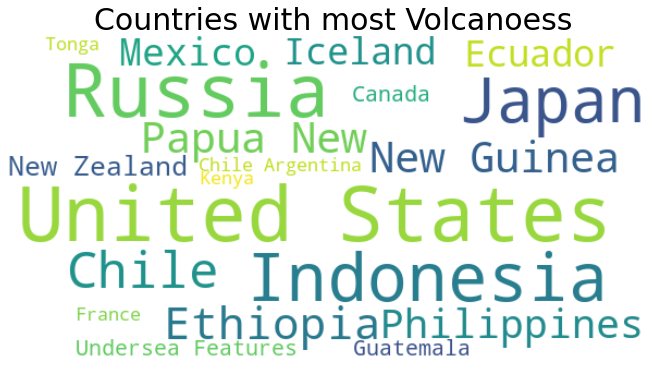

Uploading report and associated data - *please wait...*

Your report only contains a single element - did you know you can include additional plots, tables and text in a single report? Check out [the docs](https://docs.datapane.com/reports/blocks/layout-pages-and-selects) for more info

Report successfully uploaded, click [here](https://datapane.com/u/nirvannar/reports/dA9bZw3/country/) to view and share your report.

In [33]:
from wordcloud import WordCloud


text= ' '
for s, row in df.iterrows():
    text = " ".join([text," ".join(row['Country'].strip().split(" "))])#show words with spaces as one entry
    
text = text.strip() 
    
plt.figure(figsize=(12,6))
wordcloud = WordCloud(width=600, height=300, background_color ='white', max_font_size=70, max_words=20, collocations=True).generate(text)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Countries with most Volcanoess", fontsize=30)
plt.axis("off")
plt.show()
wordcloud.to_file('wordcloud.png')

image = dp.File(file='wordcloud.png')
dp.Report(image).upload(name='Country',
                        description='Countries with Most Volcanoes')

In [29]:
pip install -U datapane

In [ ]:
# add marker one by one on the map to indicate location of Holocene Volcanoes
import pandas as pd
import folium

import datapane as dp

dp.login(token='627d7678b242daf7ecba23b579eab5e6754290b8')


df = pd.read_csv('https://raw.githubusercontent.com/nirvannar/UdacityProject/main/GVP_Volcano_List_Holocene1.csv',encoding='latin-1')

m = folium.Map(location=[-26.1366728, 28.2411459], tiles="OpenStreetMap", zoom_start=3)


#for i in range(0,len(data)):
for index, row in df.iterrows():
    icon_path = r"C:/Users/nrampersad/Downloads/noun_Volcano_1708.png"
    icon = folium.features.CustomIcon(icon_image=icon_path ,icon_size=(20,20))
    folium.Marker(
              #location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
              #popup=data.iloc[i]['name'],
              [row['Latitude'], row['Longitude']], 
                  popup=row['Volcano Name'],
              icon=icon
              ).add_to(m)

# Show the map again
dp.Report(dp.Plot(m)).upload(name='folium_map')
m

In [5]:
import datapane as dp #Interactive data table in Medium

df = pd.read_csv('https://raw.githubusercontent.com/nirvannar/UdacityProject/main/GVP_Volcano_List_Holocene1.csv',encoding='latin-1')

table = dp.DataTable(df)
report = dp.Report(table)
report.upload(name='Volcano data')

Uploading report and associated data - *please wait...*

Your report only contains a single element - did you know you can include additional plots, tables and text in a single report? Check out [the docs](https://docs.datapane.com/reports/blocks/layout-pages-and-selects) for more info

Report successfully uploaded, click [here](https://datapane.com/u/nirvannar/reports/MA1pO1k/volcano-data/) to view and share your report.